Librerías.

In [1]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.model_selection import train_test_split as tts #modelar
from sklearn.linear_model import LinearRegression #regresión lineal
lr = LinearRegression()

Datos.

In [2]:
datos = "1000_Empresas_mas_grandes_del_pa_s.csv"
db = pd.read_csv(datos) #we're in
db.head() #vista previa de los datos

,No.,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,6.257985e+10,1.155640e+10,1.137618e+11,5.654822e+10,5.721361e+10,4.968708e+10,6.620412e+09,1.075490e+11,5.965040e+10,4.789863e+10,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,1.487944e+10,1.337414e+08,5.488096e+09,3.525498e+09,1.962597e+09,1.249326e+10,1.952812e+08,3.863475e+09,2.186212e+09,1.677263e+09,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,1.291943e+10,-8.024497e+08,2.788179e+10,9.121544e+09,1.876025e+10,9.150339e+09,4.809466e+07,2.677963e+10,8.612363e+09,1.816726e+10,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,1.144449e+10,2.794030e+08,1.566335e+10,8.013609e+09,7.649740e+09,1.125092e+10,2.177130e+08,1.596270e+10,8.123134e+09,7.839568e+09,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8.966811e+09,2.344822e+09,4.559554e+10,2.299022e+10,2.260532e+10,7.927149e+09,2.188189e+09,3.958096e+10,1.808298e+10,2.149798e+10,NIIF PLENAS-GRUPO 1


NO HAY relaciones entre variables categóricas de esta base de datos.

Estadística descriptiva.

In [3]:
db.describe()

,No.,NIT,INGRESOS OPERACIONALES\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,8.595136e+08,6.799250e+08,6.855500e+07,9.862732e+08,4.598472e+08,5.264260e+08,5.885920e+08,4.369164e+07,9.055083e+08,4.069496e+08,4.985587e+08
std,288.819436,3.795142e+07,2.274348e+09,4.498809e+08,4.505014e+09,2.154427e+09,2.535467e+09,1.852301e+09,2.944797e+08,4.230273e+09,2.154613e+09,2.298834e+09
min,1.000000,8.000003e+08,1.343546e+08,-8.024497e+08,7.329964e+06,4.270000e+04,-7.303930e+08,0.000000e+00,-1.070240e+09,6.788196e+06,6.309000e+03,-6.786768e+08
25%,250.750000,8.300119e+08,1.770936e+08,1.013276e+06,1.196560e+08,6.635366e+07,3.197481e+07,1.572204e+08,4.728625e+05,1.064891e+08,5.937111e+07,2.744144e+07
50%,500.500000,8.600694e+08,2.728692e+08,6.456776e+06,2.409461e+08,1.312229e+08,8.352536e+07,2.468953e+08,5.046002e+06,2.105828e+08,1.161531e+08,7.707573e+07
75%,750.250000,8.913002e+08,5.645334e+08,2.423737e+07,5.937477e+08,3.185258e+08,2.496863e+08,4.979094e+08,1.891708e+07,5.312882e+08,2.816762e+08,2.198727e+08
max,1000.000000,9.010975e+08,6.257985e+10,1.155640e+10,1.137618e+11,5.654822e+10,5.721361e+10,4.968708e+10,6.620412e+09,1.075490e+11,5.965040e+10,4.789863e+10


A. Positiva: Sobreestimar. Tiende a decrescer.

A. Negativa: Subestimar. Tiennde a crecer.

C:\Users\luisr\AppData\Local\Temp\ipykernel_31464\911649136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(), annot = True)


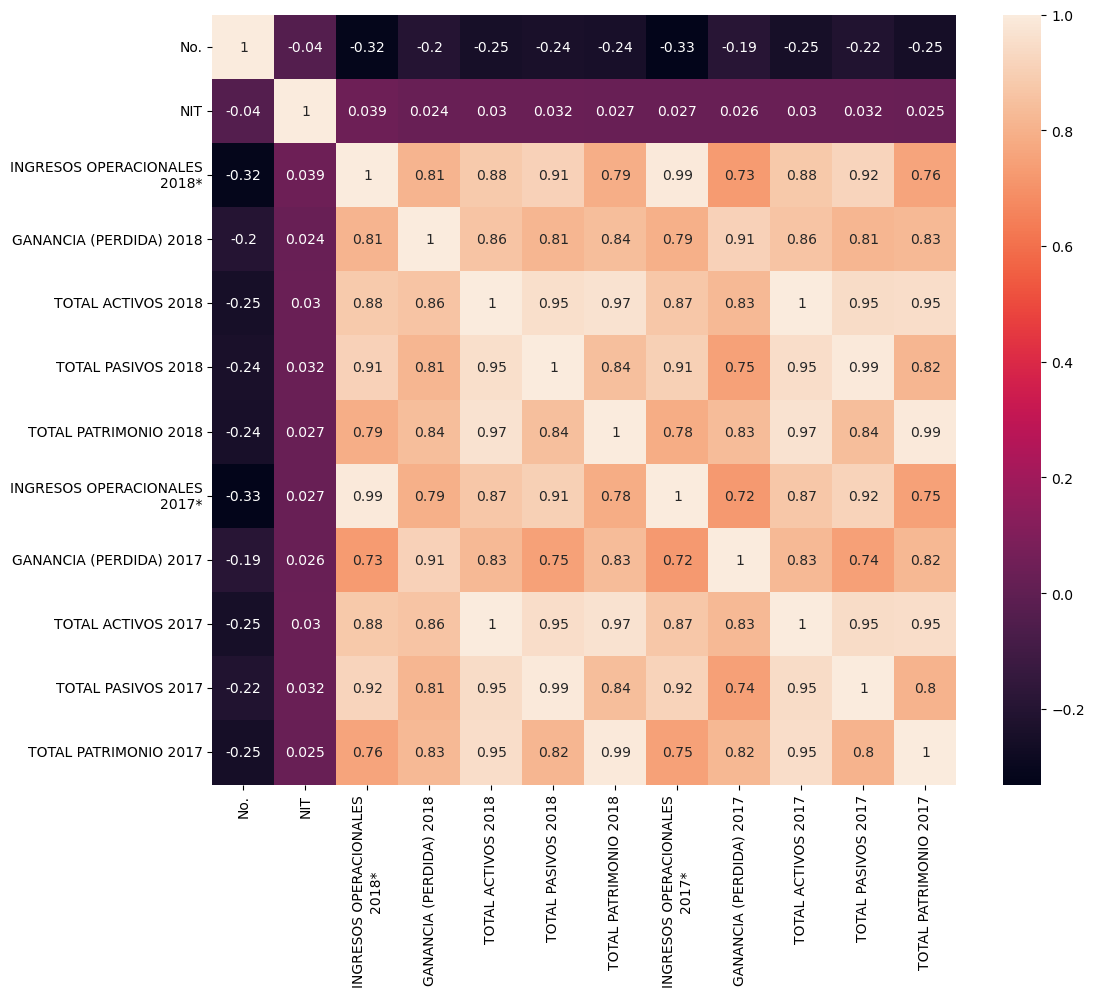

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(db.corr(), annot = True)
plt.show()

Trataremos de predecir GANANCIAS 2018 (Y) con todas las variables del año 2017.

In [5]:
db.columns

Index(['No.', 'NIT', 'RAZON SOCIAL', 'SUPERVISOR', 'REGIÓN',
       'DEPARTAMENTO DOMICILIO', 'CIUDAD DOMICILIO', 'CIIU', 'MACROSECTOR',
       'INGRESOS OPERACIONALES\n2018*', 'GANANCIA (PERDIDA) 2018',
       'TOTAL ACTIVOS 2018', 'TOTAL PASIVOS 2018', 'TOTAL PATRIMONIO 2018',
       'INGRESOS OPERACIONALES\n2017*', 'GANANCIA (PERDIDA) 2017',
       'TOTAL ACTIVOS 2017', 'TOTAL PASIVOS 2017', 'TOTAL PATRIMONIO 2017',
       'GRUPO EN NIIF'],
      dtype='object')

Creamos la base de datos con la información necesaria para predecir las GANANCIAS 2018.

In [6]:
db_reg = db[['INGRESOS OPERACIONALES\n2017*',
              'GANANCIA (PERDIDA) 2017',
              'TOTAL ACTIVOS 2017',
              'TOTAL PASIVOS 2017',
              'TOTAL PATRIMONIO 2017',
              'INGRESOS OPERACIONALES\n2018*',
              'GANANCIA (PERDIDA) 2018']]

db_reg.head()

,INGRESOS OPERACIONALES\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,INGRESOS OPERACIONALES\n2018*,GANANCIA (PERDIDA) 2018
0,4.968708e+10,6.620412e+09,1.075490e+11,5.965040e+10,4.789863e+10,6.257985e+10,1.155640e+10
1,1.249326e+10,1.952812e+08,3.863475e+09,2.186212e+09,1.677263e+09,1.487944e+10,1.337414e+08
2,9.150339e+09,4.809466e+07,2.677963e+10,8.612363e+09,1.816726e+10,1.291943e+10,-8.024497e+08
3,1.125092e+10,2.177130e+08,1.596270e+10,8.123134e+09,7.839568e+09,1.144449e+10,2.794030e+08
4,7.927149e+09,2.188189e+09,3.958096e+10,1.808298e+10,2.149798e+10,8.966811e+09,2.344822e+09


<Axes: xlabel='GANANCIA (PERDIDA) 2018'>

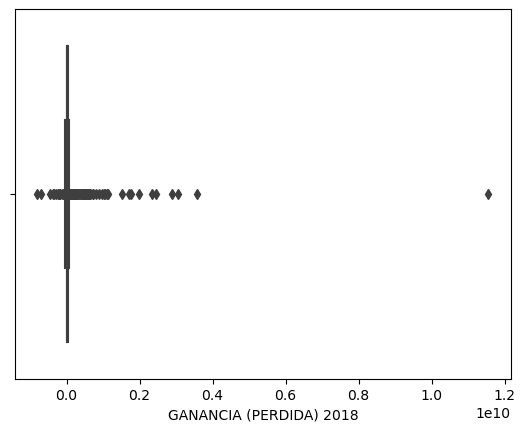

In [7]:
iops_17 = db_reg['INGRESOS OPERACIONALES\n2017*']
ganancia_17 = db_reg['GANANCIA (PERDIDA) 2017']
activos_17 = db_reg['TOTAL ACTIVOS 2017']
pasivos_17 = db_reg['TOTAL PASIVOS 2017']
patrimonio_17 = db_reg['TOTAL PATRIMONIO 2017']
iops_18 = db_reg['INGRESOS OPERACIONALES\n2018*']
ganancia_18 = db_reg['GANANCIA (PERDIDA) 2018']

cv = lambda x: np.std(x, ddof = 1 ) / np.mean(x) * 100

#print(cv(iops_17))
#print(cv(ganancia_17))
#print(cv(activos_17))
#print(cv(pasivos_17))
#print(cv(iops_18))
#print(cv(ganancia_18))

#sns.histplot(x=ganancia_18)
sns.boxplot(x=ganancia_18)

In [8]:
print(db_reg.corr()['INGRESOS OPERACIONALES\n2018*'])
print(db_reg.corr()['GANANCIA (PERDIDA) 2018'])

INGRESOS OPERACIONALES\n2017*    0.991809
GANANCIA (PERDIDA) 2017          0.726246
TOTAL ACTIVOS 2017               0.879097
TOTAL PASIVOS 2017               0.919208
TOTAL PATRIMONIO 2017            0.756160
INGRESOS OPERACIONALES\n2018*    1.000000
GANANCIA (PERDIDA) 2018          0.809916
Name: INGRESOS OPERACIONALES\n2018*, dtype: float64
INGRESOS OPERACIONALES\n2017*    0.793726
GANANCIA (PERDIDA) 2017          0.910064
TOTAL ACTIVOS 2017               0.863231
TOTAL PASIVOS 2017               0.813315
TOTAL PATRIMONIO 2017            0.826212
INGRESOS OPERACIONALES\n2018*    0.809916
GANANCIA (PERDIDA) 2018          1.000000
Name: GANANCIA (PERDIDA) 2018, dtype: float64


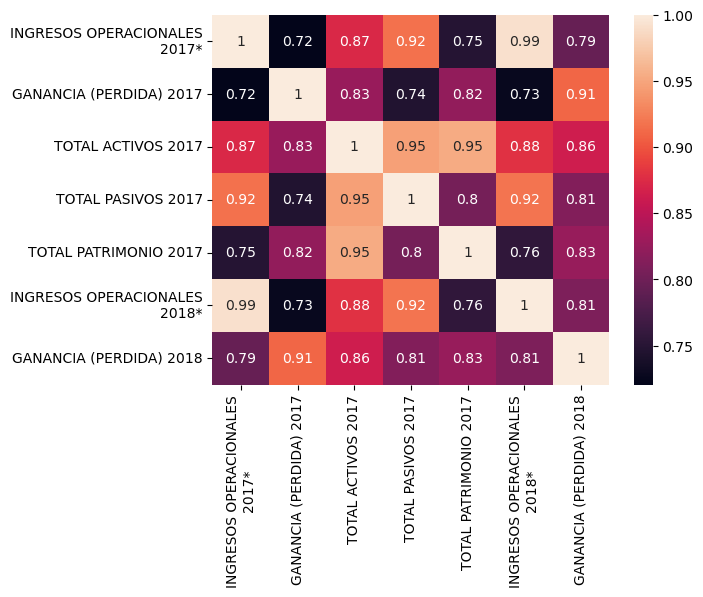

In [9]:
sns.heatmap(db_reg.corr(), annot = True)
plt.show()

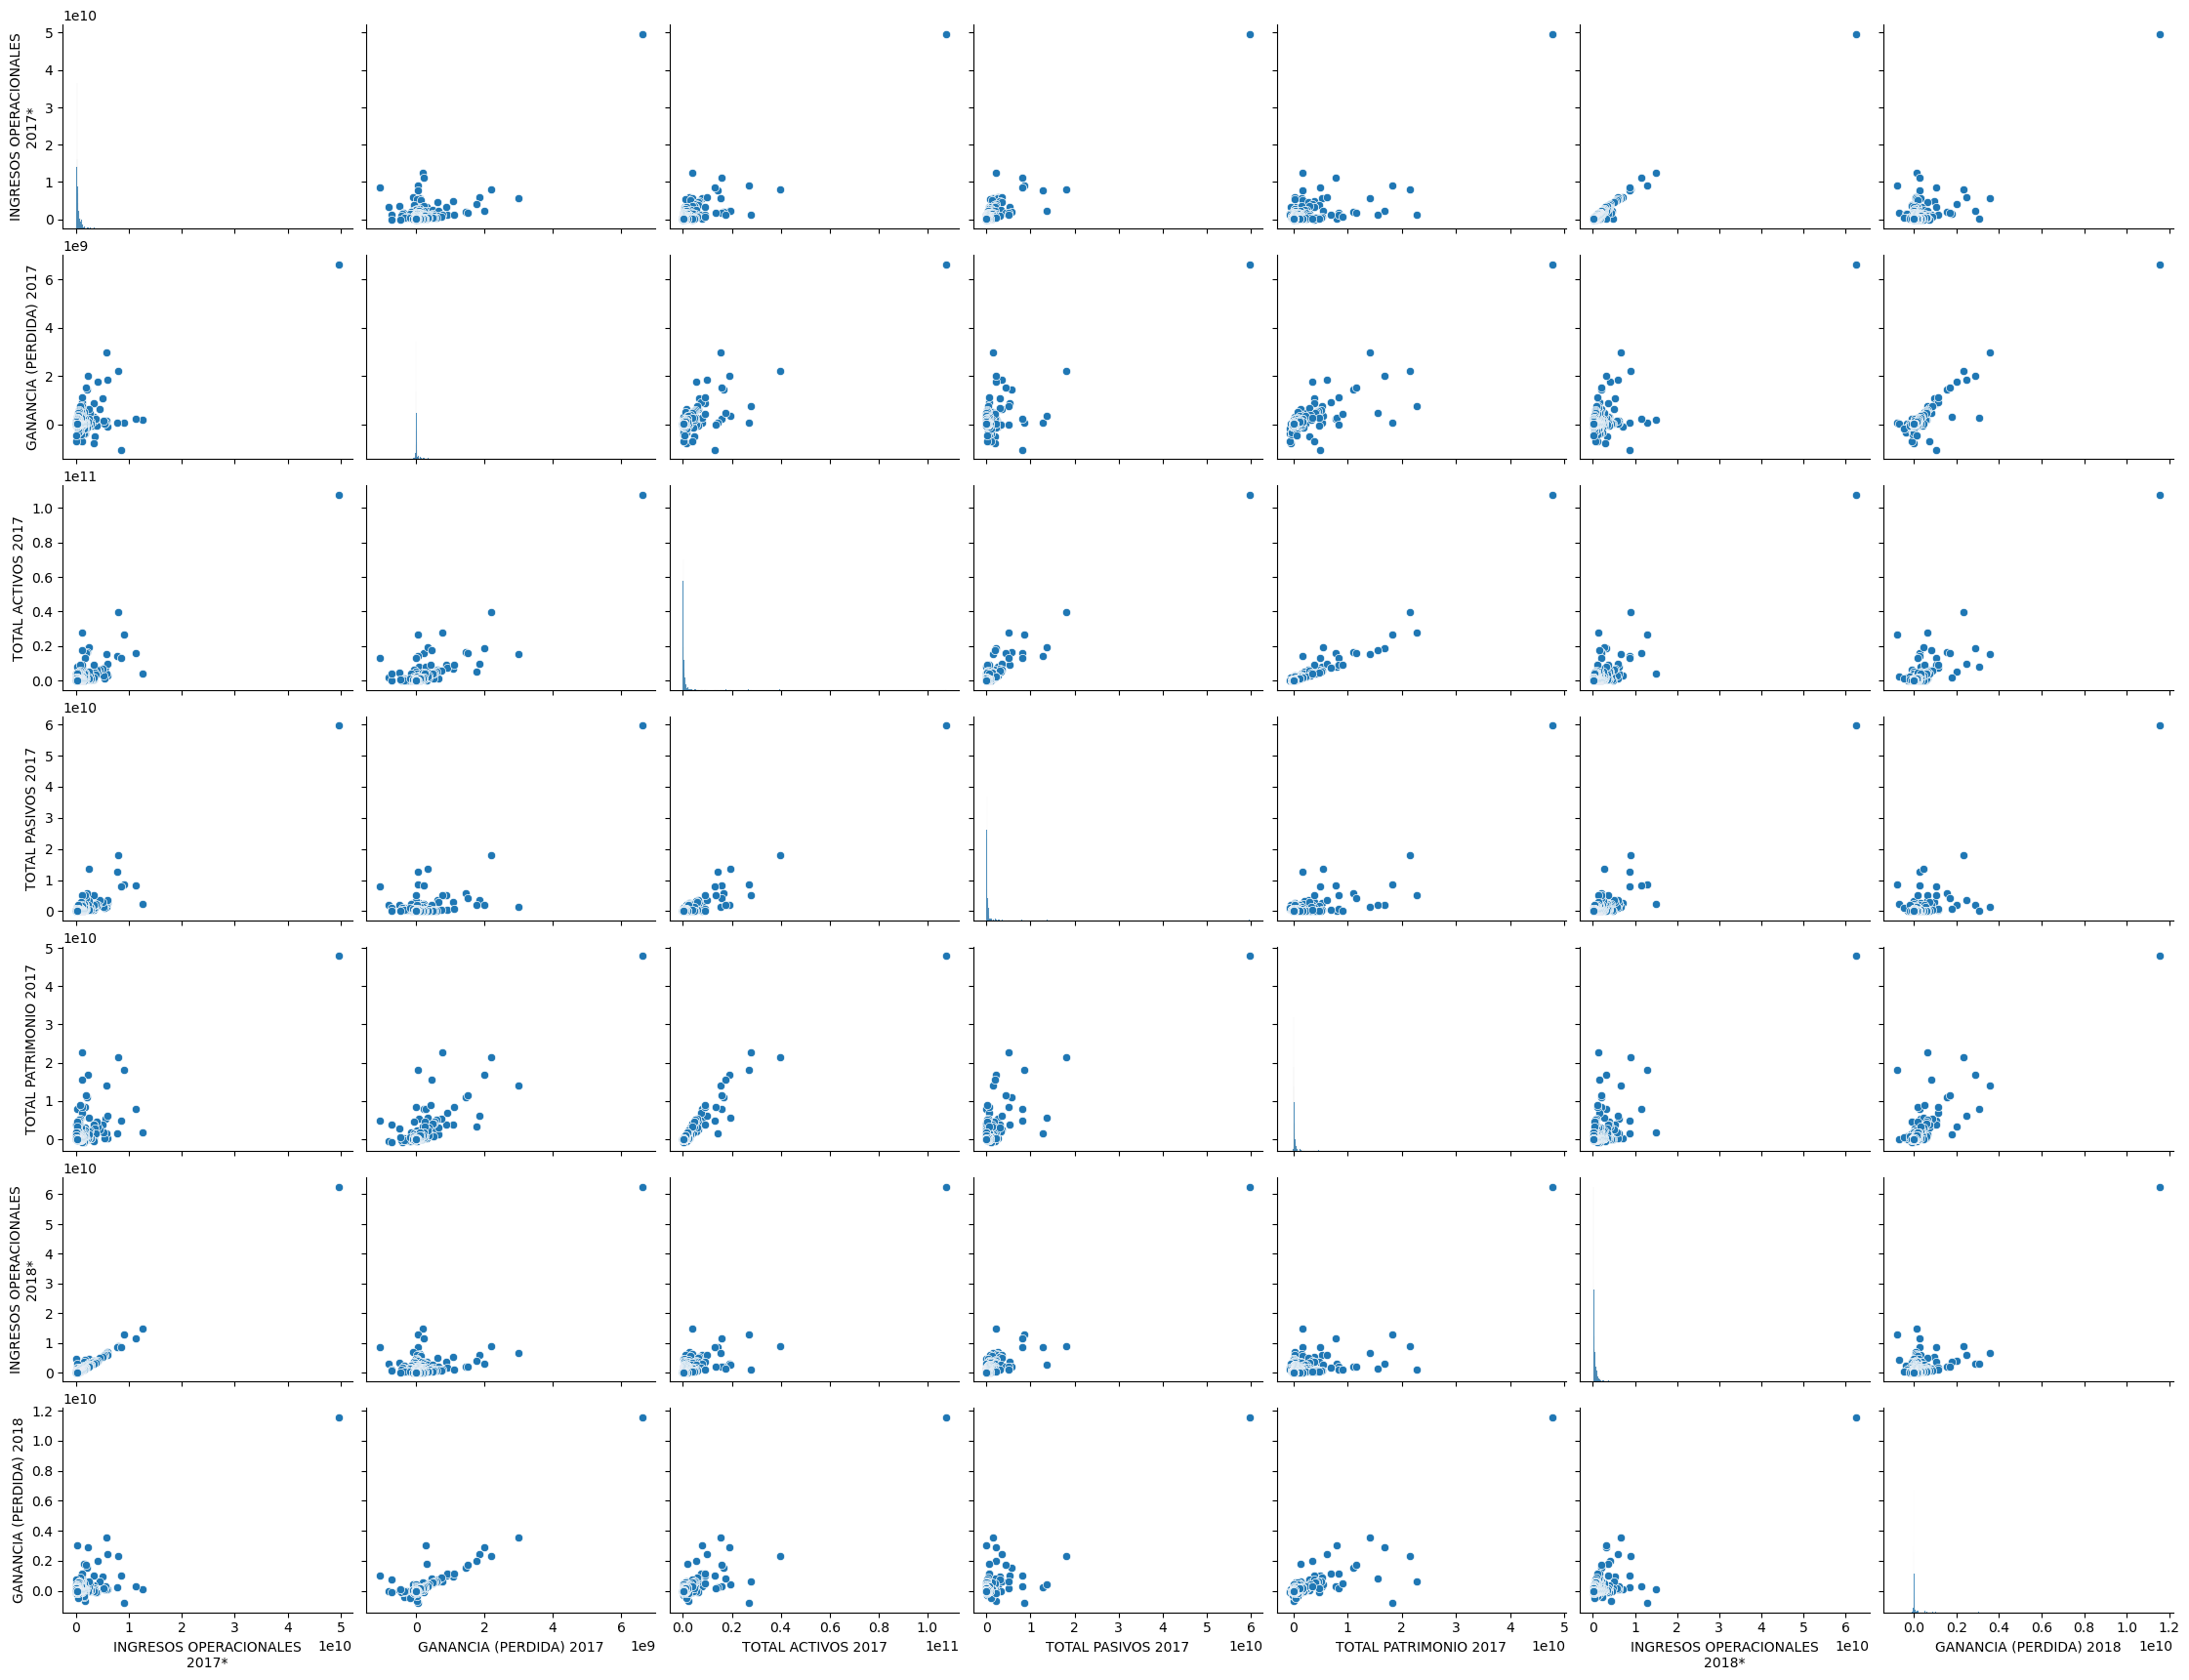

In [10]:
sns.pairplot(data = db_reg, height = 2.5, aspect = 1.3)

In [11]:
db_reg.columns

Index(['INGRESOS OPERACIONALES\n2017*', 'GANANCIA (PERDIDA) 2017',
       'TOTAL ACTIVOS 2017', 'TOTAL PASIVOS 2017', 'TOTAL PATRIMONIO 2017',
       'INGRESOS OPERACIONALES\n2018*', 'GANANCIA (PERDIDA) 2018'],
      dtype='object')

In [16]:
def ln(x): #creación de valores ln para cada columna
    return math.log(x)

test=db['INGRESOS OPERACIONALES\n2017*'].apply(ln)
print(test)

#db_reg['INGRESOS OPERACIONALES\n2017*_ln'] = db_reg['INGRESOS OPERACIONALES\n2017*'].apply(ln)
#db_reg['GANANCIA (PERDIDA) 2017_ln'] = db_reg['GANANCIA (PERDIDA) 2017'].apply(ln)
#db_reg['TOTAL ACTIVOS 2017_ln'] = activos_17.apply(ln)
#db_reg['TOTAL PASIVOS 2017_ln'] = pasivos_17.apply(ln)
#db_reg['TOTAL PATRIMONIO 2017_ln'] = patrimonio_17.apply(ln)
#db_reg['INGRESOS OPERACIONALES\n2018*_ln'] = iops_18.apply(ln)
#db_reg['GANANCIA (PERDIDA) 2018_ln'] = ganancia_18.apply(ln)

ValueError: math domain error